In [1]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [3]:
#WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')
#data_dir_path = WORK_DIR / Path('experiments/initial_testing_timedep
data_dir_path = WORK_DIR / Path('examples/reaction/dumps')

FOM_data_path = data_dir_path / '20250415_121158_FOM_IRGNM'
TR_data_path = data_dir_path / '20250415_120442_TR_IRGNM'

setup_path = FOM_data_path / 'setup.pkl'
optimizer_parameter_path = FOM_data_path / 'optimizer_parameter.pkl'


with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM, grid_data, assembled_products = build_InstationaryModelIP(setup=setup)

    

data = {}

if FOM_data_path:
    with open(FOM_data_path / 'FOM_IRGNM_final.pkl', 'rb') as file:
        FOM_data = load(file)
    data['FOM'] = FOM_data

if TR_data_path:
    with open(TR_data_path / 'TR_IRGNM_final.pkl', 'rb') as file:
        TR_data = load(file)
    data['TR'] = TR_data
    


[2025-04-15 13:33:10,656][__init__] - Setting up InstationaryModelIP
[2025-04-15 13:33:14,512][discretize_instationary_IP] - noise percentage is 7.0707e-08
[2025-04-15 13:33:14,513][discretize_instationary_IP] - noise_level is 1.0000e-05
[2025-04-15 13:33:14,707][__init__] - Setting up InstationaryModelIP


In [4]:
print("Total runtime:")

times = {}

for name, d in data.items():
    times[name] = int(np.ceil(d['total_runtime'][-1]))

    if name == 'FOM':
        speed_up_str = ' | --'
    if name == 'TR':
        speed_up = times['FOM'] / times['TR'] 
        speed_up_str = f' | {speed_up:3.3}'
    

    print(f"{name} : {times[name]}s" + speed_up_str)

Total runtime:
FOM : 3818s | --
TR : 192s | 19.9


In [5]:
from RBInvParam.products import BochnerProductOperator

q_FOM = data['FOM']['q'][-1]
q_TR = data['TR']['q'][-1]

#nt = setup['dims']['nt']
nt = 1

bochner_L2 = BochnerProductOperator(
    product=NumpyMatrixOperator(
        matrix = assembled_products['l2'],
        source_id = FOM.Q.id,
        range_id = FOM.Q.id
    ),
    delta_t=setup['model_parameter']['delta_t'],
    space = FOM.Q,
    nt = nt
)

print("L2 rel error:")
result = np.sqrt(bochner_L2.apply2(q_FOM-q_TR, q_FOM-q_TR)[0,0]) / np.sqrt(bochner_L2.apply2(q_FOM, q_FOM)[0,0]) * 100
print(f"{result:.2f}")


bochner_H1 = BochnerProductOperator(
    product=NumpyMatrixOperator(
        matrix = assembled_products['h1'],
        source_id = FOM.Q.id,
        range_id = FOM.Q.id
    ),
    delta_t=setup['model_parameter']['delta_t'],
    space = FOM.Q,
    nt = nt
)

print("H1 rel error:")
result = np.sqrt(bochner_H1.apply2(q_FOM-q_TR, q_FOM-q_TR)[0,0]) / np.sqrt(bochner_H1.apply2(q_FOM, q_FOM)[0,0]) * 100
print(f"{result:.2f}")



L2 rel error:
3.59
H1 rel error:
14.77


In [6]:
len(d['J'])

6

In [ ]:
FOM.visualizer.visualize(q)

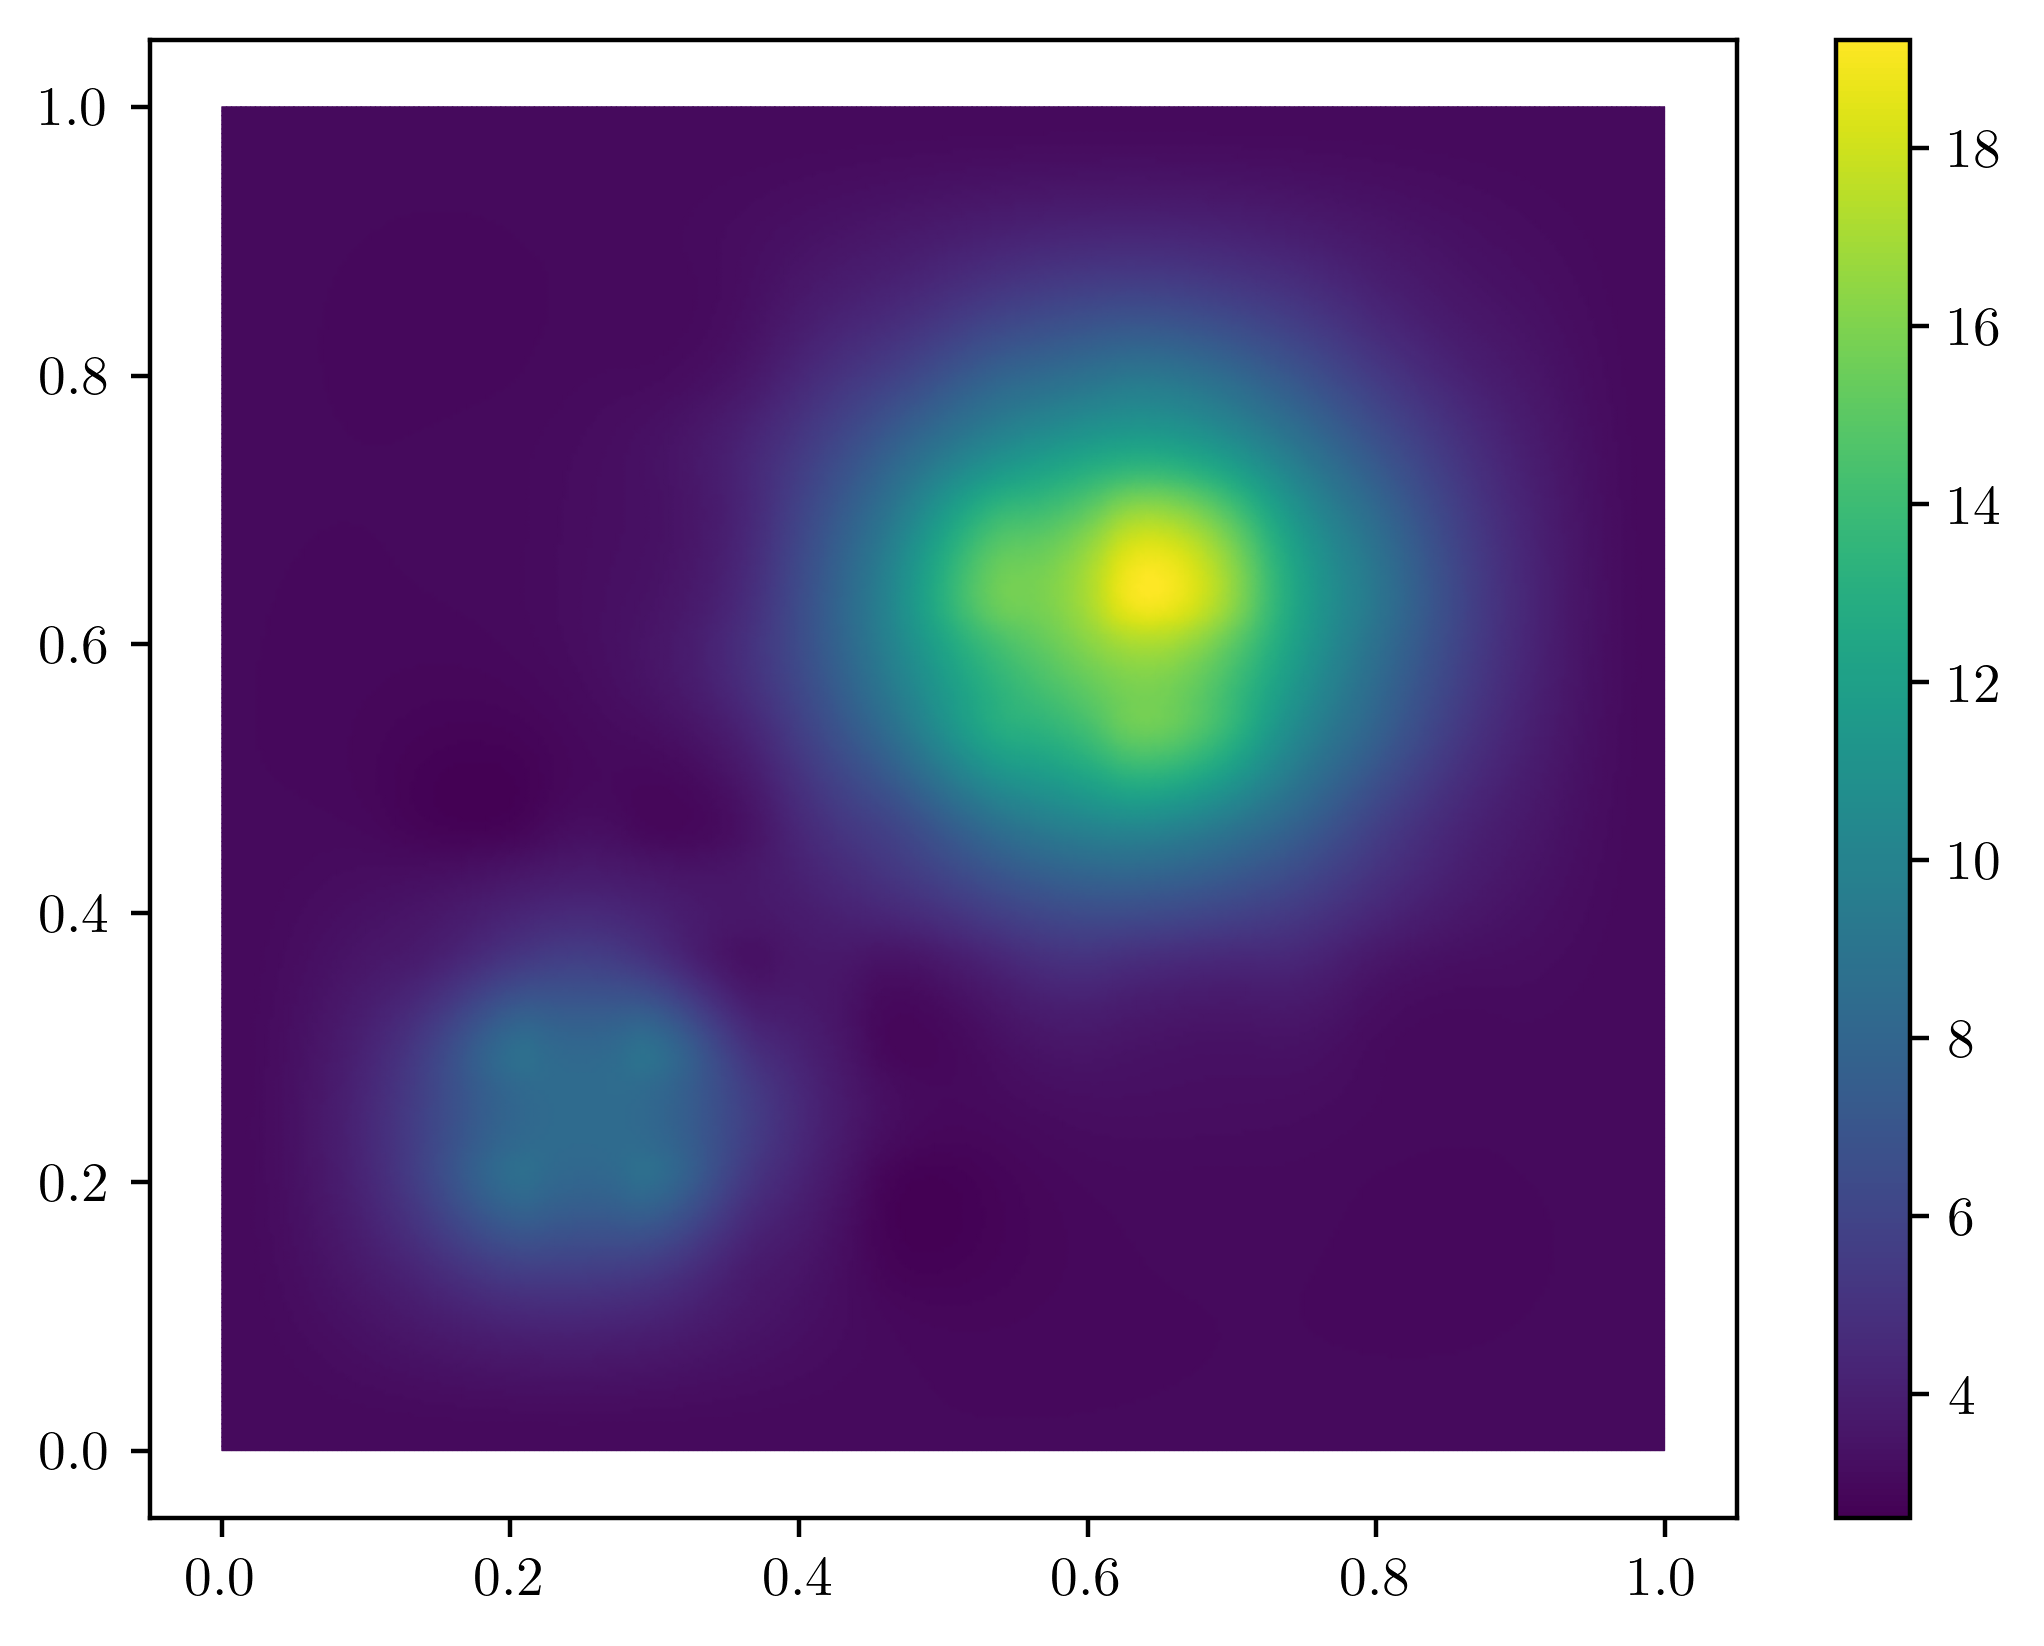

In [7]:
FOM.visualizer.visualize(data['FOM']['q'][-1])

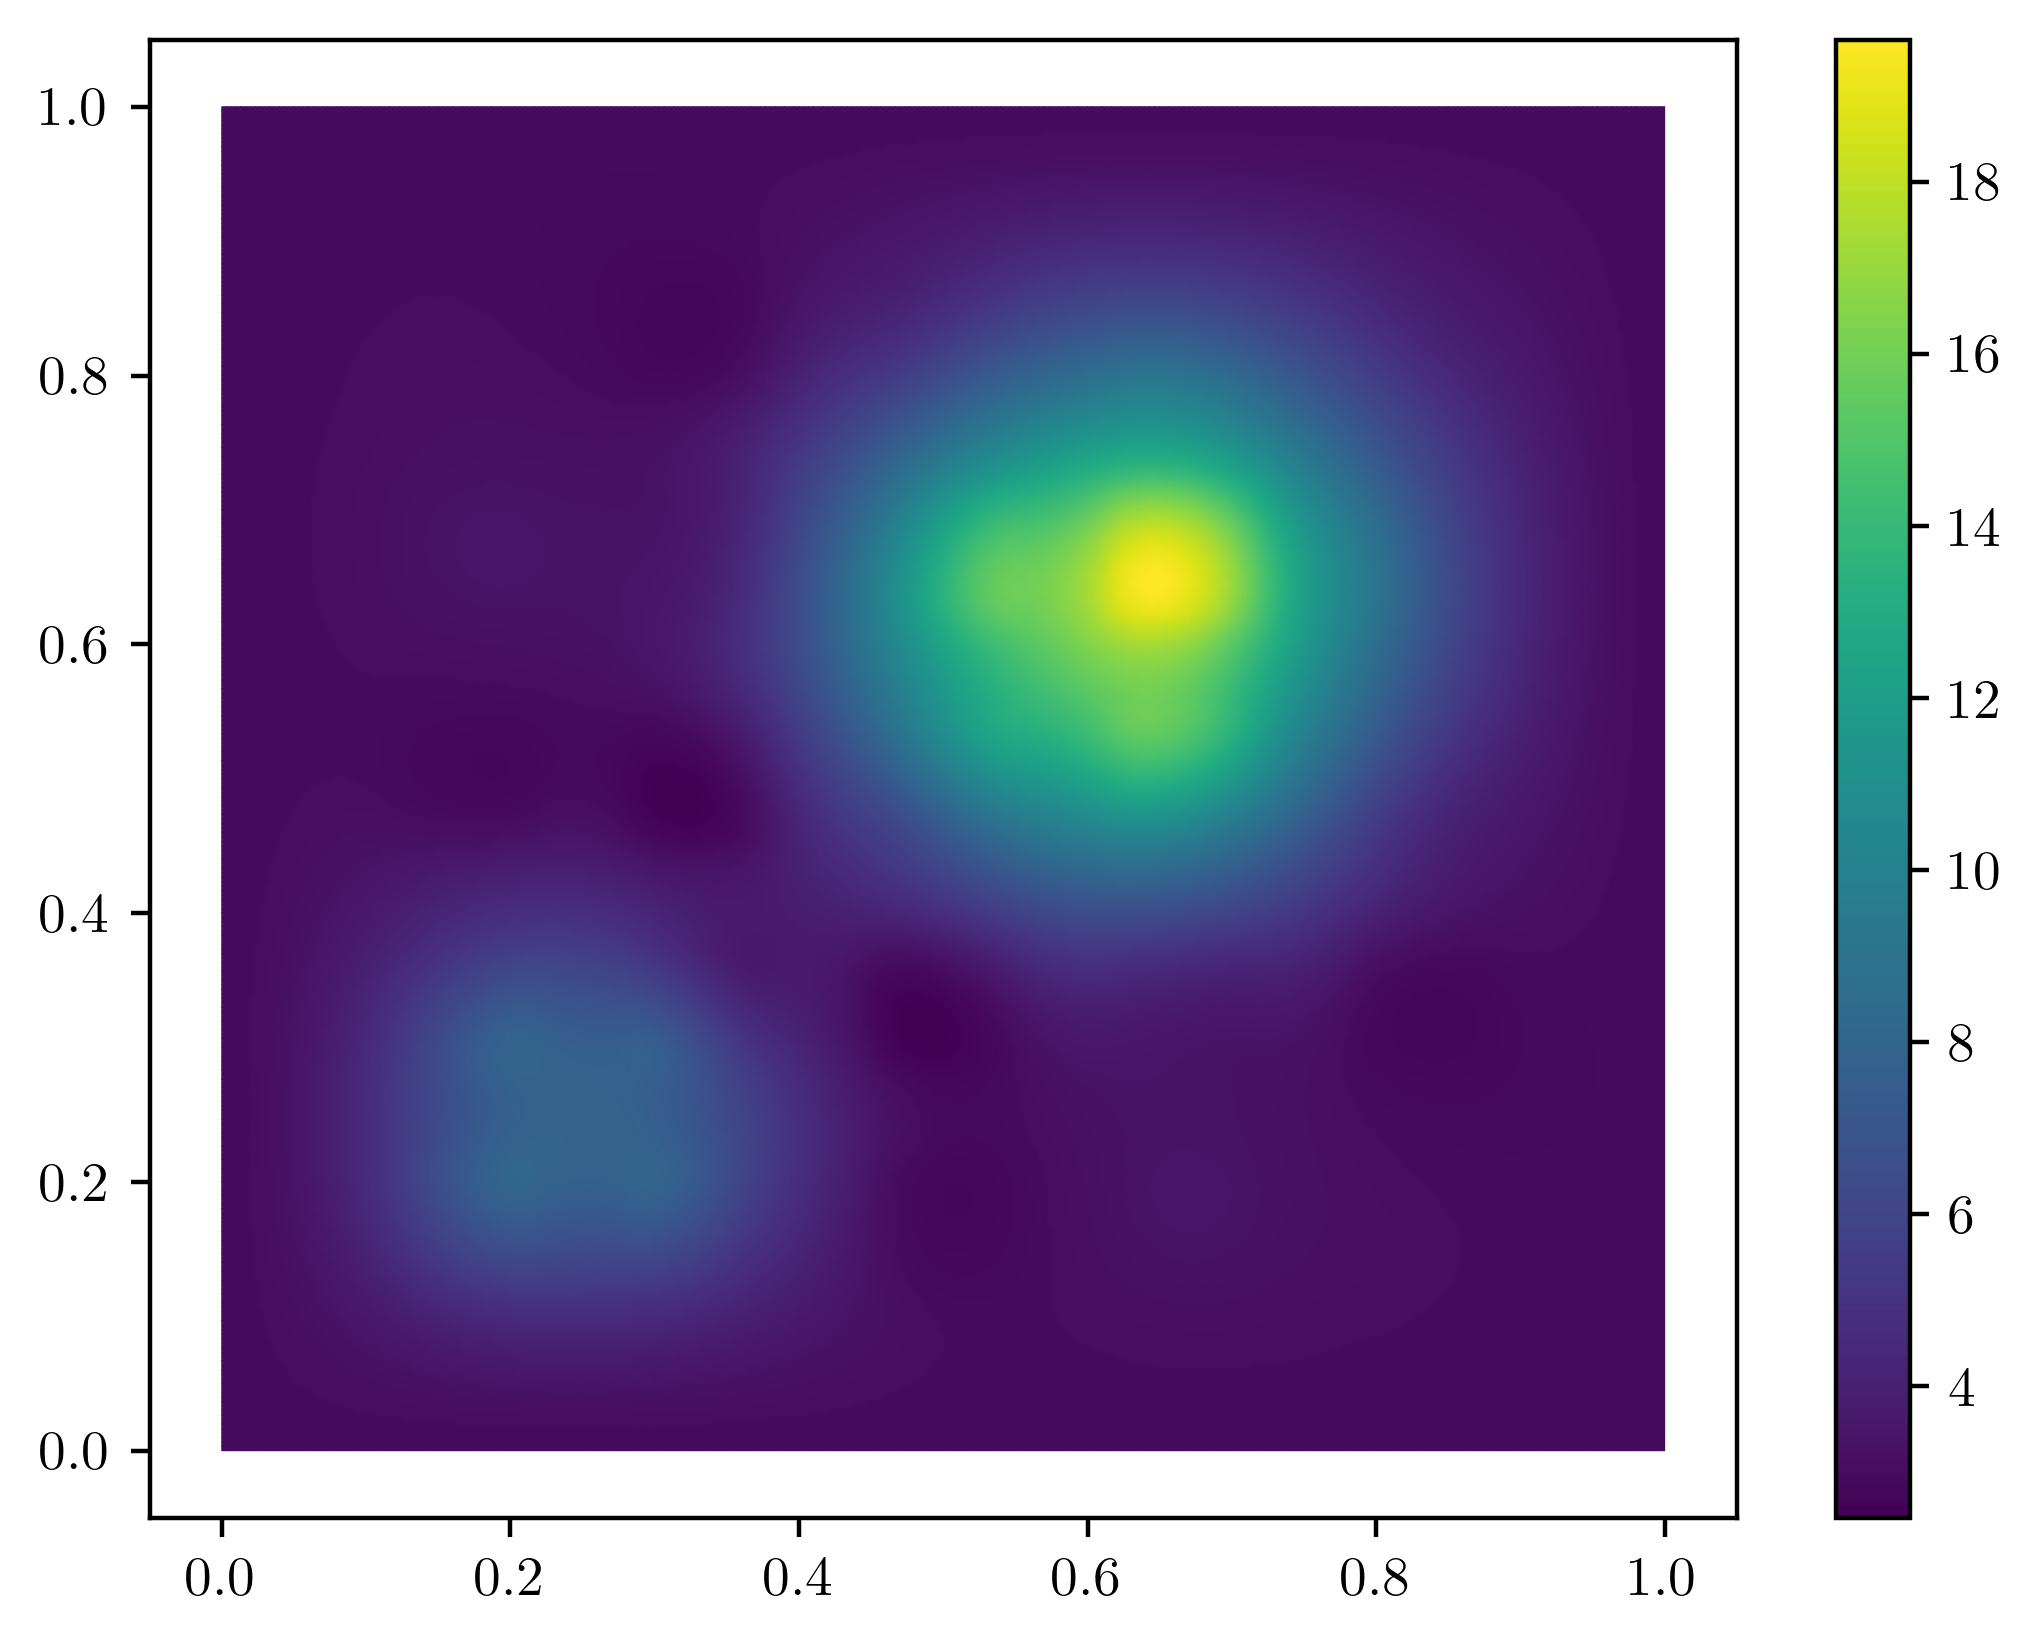

In [8]:
FOM.visualizer.visualize(data['TR']['q'][-1])

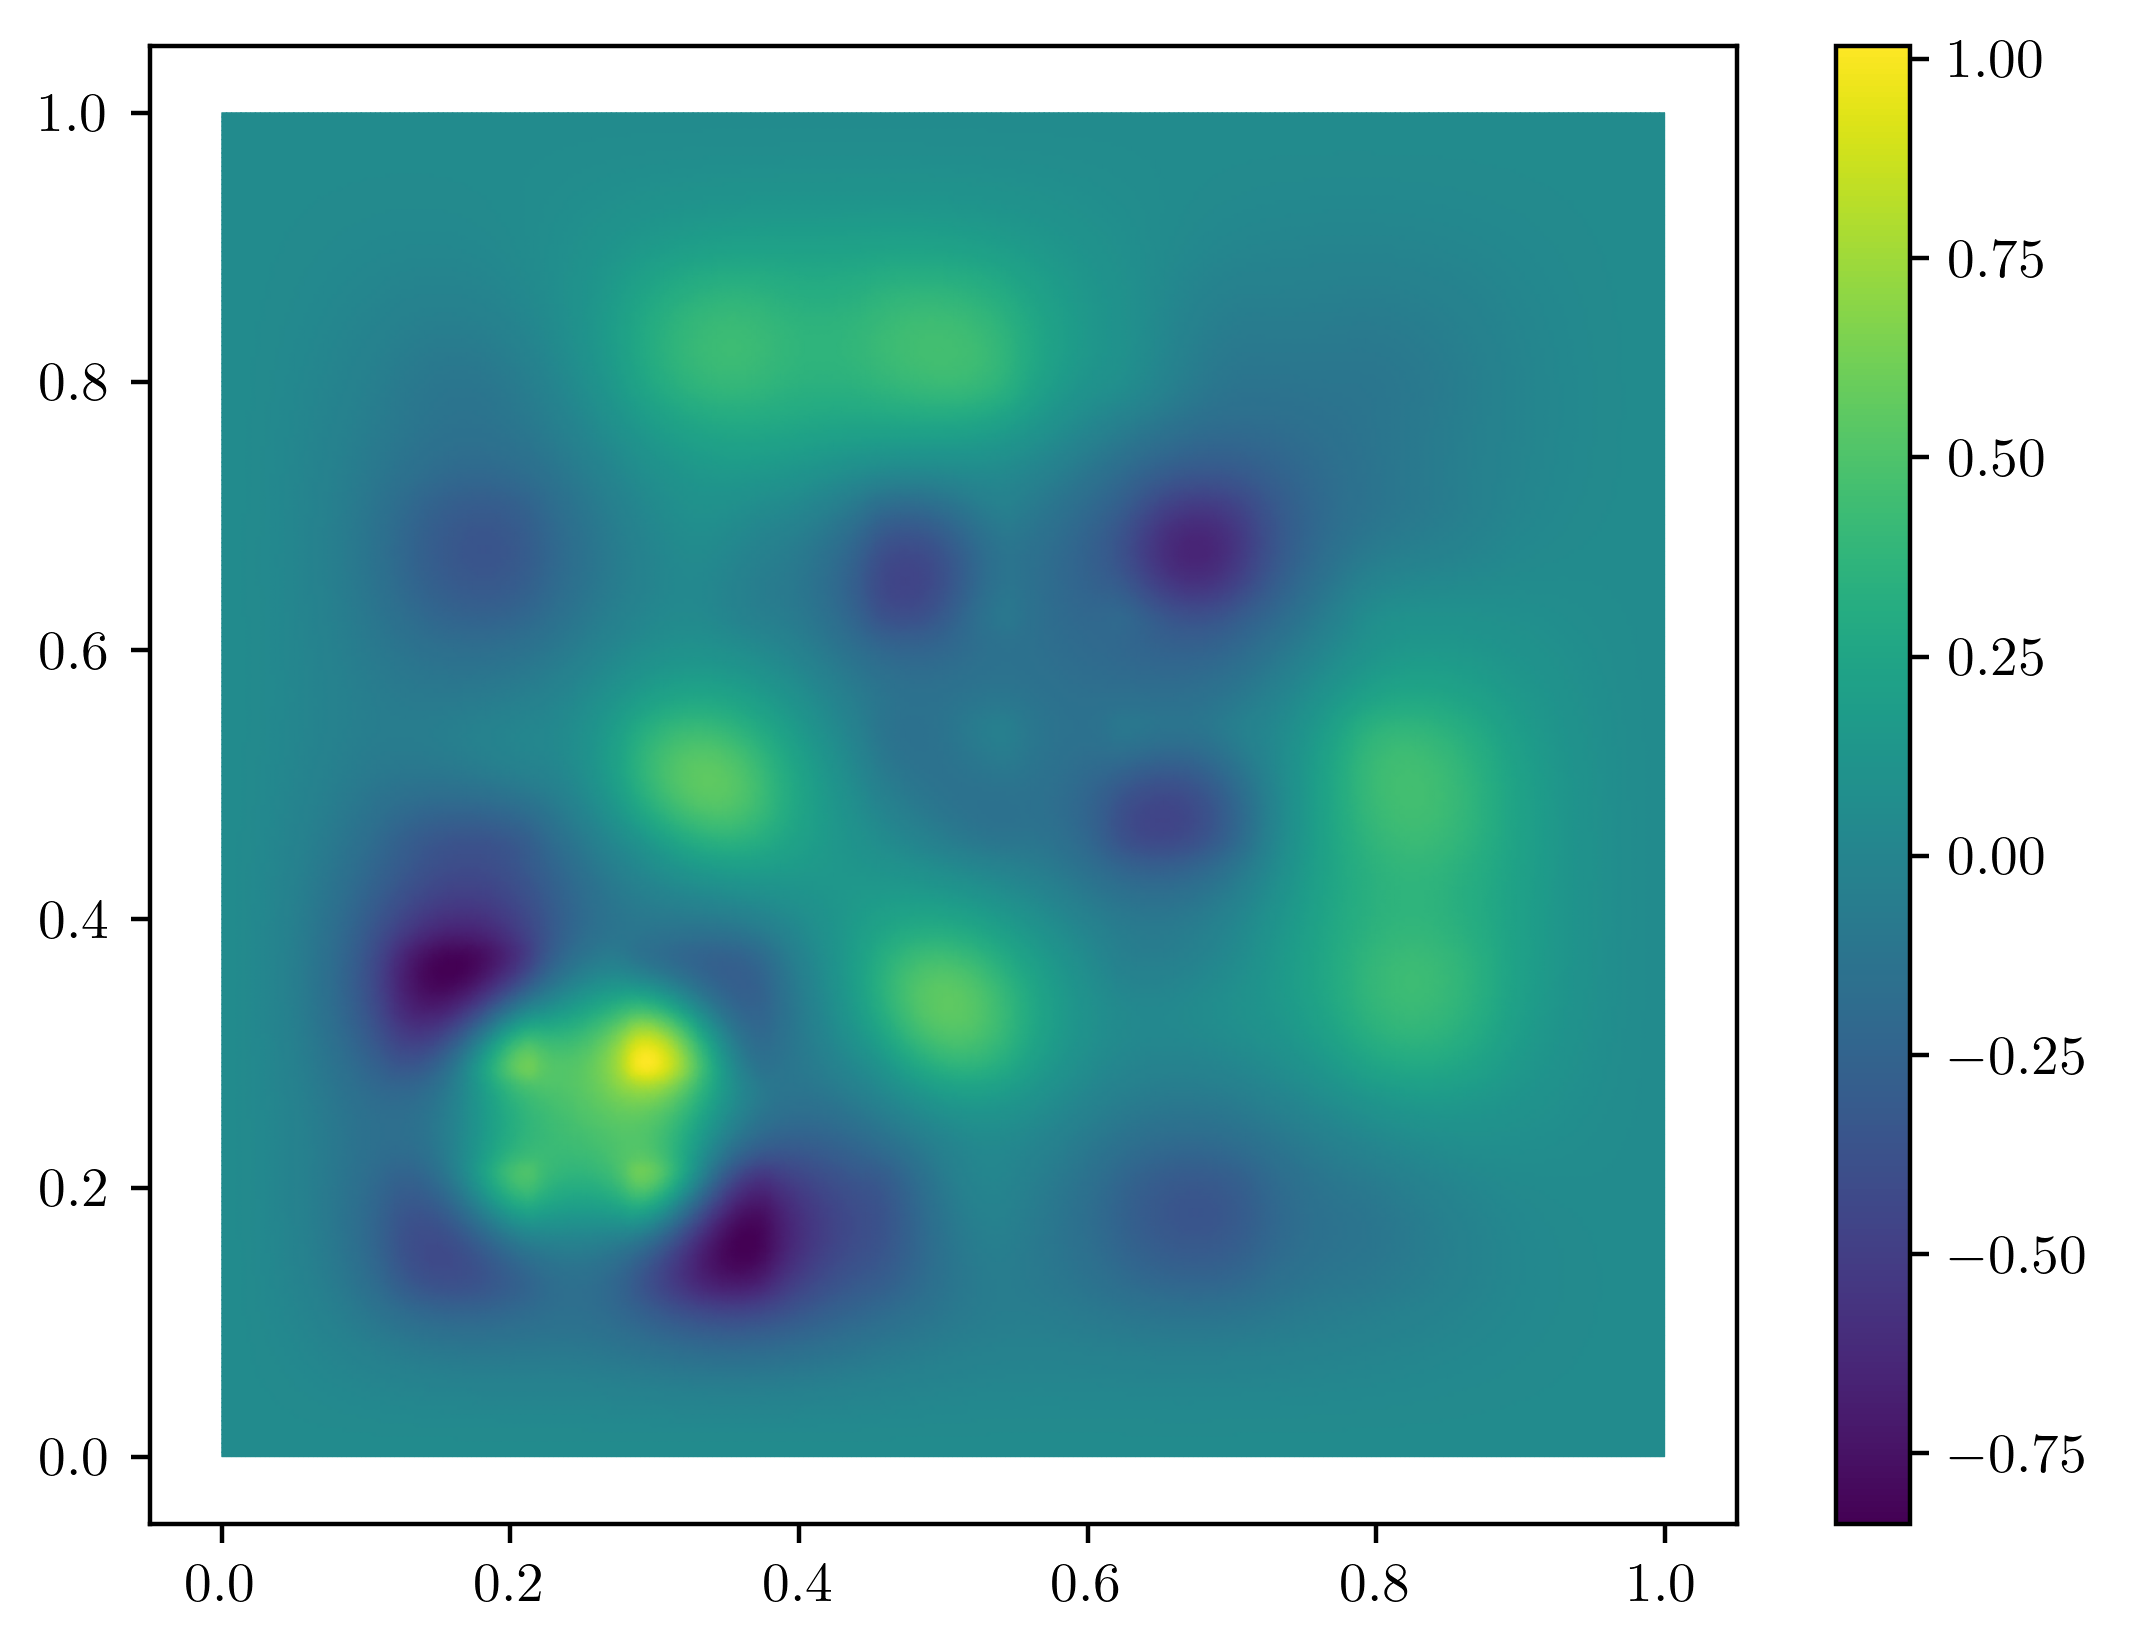

In [9]:
FOM.visualizer.visualize(data['FOM']['q'][-1] - data['TR']['q'][-1])